In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.version)


<module 'tensorflow_core._api.v2.version' from 'C:\\Users\\Admin\\.conda\\envs\\Tensorflow\\lib\\site-packages\\tensorflow_core\\_api\\v2\\version\\__init__.py'>


In [5]:
fashion_mnist= keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels)= fashion_mnist.load_data()


In [7]:
class_names= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

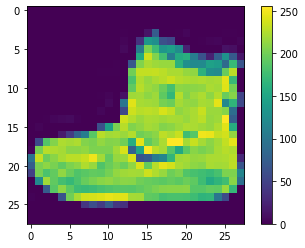

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images/255.0
test_images = test_images/255.0

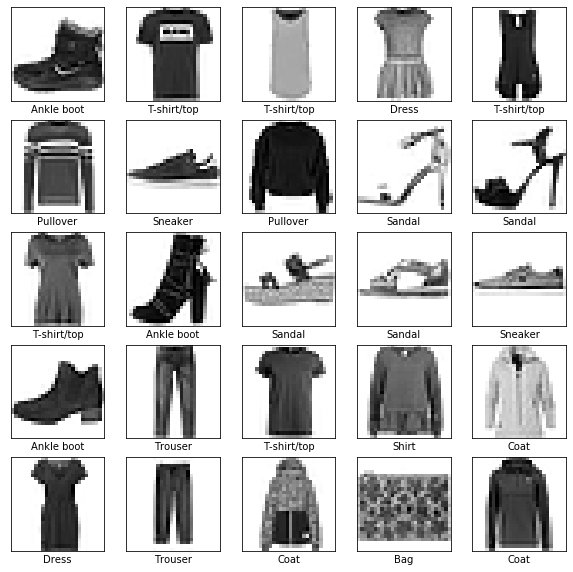

In [15]:
plt.figure(figsize = (10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential([
              keras.layers.Flatten(input_shape = (28,28)), 
             keras.layers.Dense(128,activation=tf.nn.relu), 
            keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [22]:
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.5007 - accuracy: 0.8236
Epoch 2/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3737 - accuracy: 0.8649
Epoch 3/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3384 - accuracy: 0.8773
Epoch 4/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3151 - accuracy: 0.8856
Epoch 5/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2962 - accuracy: 0.8911


In [18]:
test_loss,test_acc= model.evaluate(test_images,test_labels)
print('test accuracy:',test_acc)

10000/10000 [==============================] - 1s 141us/sample - loss: 2.4038 - accuracy: 0.1362
test accuracy: 0.1362


In [19]:
prediction=model.predict(test_images)

In [20]:
prediction[0]

array([0.06033136, 0.11663662, 0.06817172, 0.08270169, 0.12310459,
       0.12649481, 0.09695309, 0.20352888, 0.051035  , 0.07104234],
      dtype=float32)

In [21]:
np.argmax(prediction[0])

7

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i,prediction_array,true_label,img):
    prediction_array,true_label,img = prediction_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label= np.argmax(prediction_array)
    if predicted_label == true_label:
        color='blue'
        
    else:
        color='red'
        
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
              100*np.max(prediction_array),
              class_names[true_label]),color=color)
    
def plot_value_array(i,prediction_array,true_label):
        prediction_array,true_label=prediction_array[i],true_label[i]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        thisplot = plt.bar(range(10), prediction_array,color="#777777")
        plt.ylim([0,1])
        predicted_label = np.argmax(prediction_array)
        
        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('green')



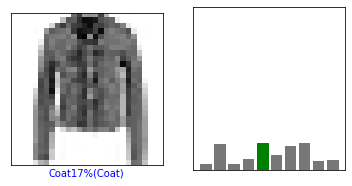

In [24]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction ,test_labels)
plt.show()

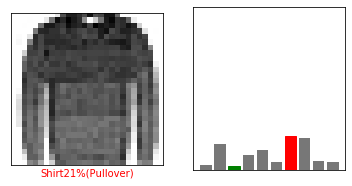

In [25]:
i=20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,test_labels)
plt.show()

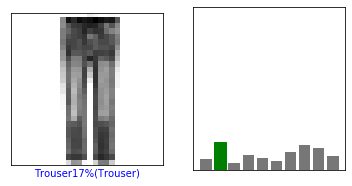

In [26]:
i=15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,test_labels)
plt.show()

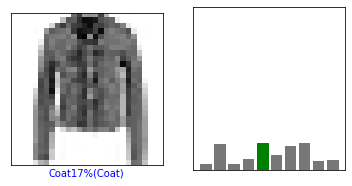

In [27]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,test_labels)
plt.show()

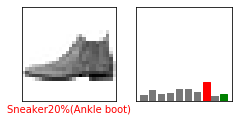

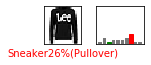

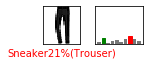

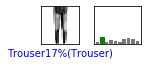

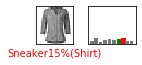

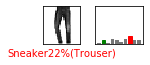

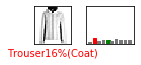

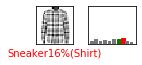

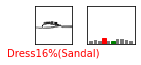

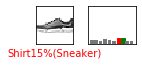

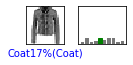

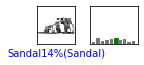

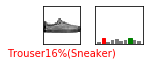

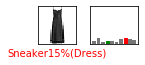

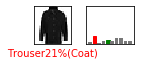

In [28]:
num_rows= 5
num_cols= 3
num_image= num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range (num_image):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,prediction,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,prediction,test_labels)
    plt.grid(False)
    plt.show()

In [29]:
img=test_images[0]

print(img.shape)

(28, 28)


In [30]:
img= (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
prediction_single=model.predict(img)

print(prediction_single)

[[0.06033135 0.11663662 0.06817172 0.08270168 0.12310456 0.1264948
  0.09695308 0.20352884 0.05103499 0.07104232]]


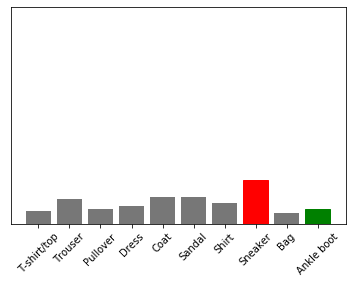

In [32]:
plot_value_array(0,prediction_single,test_labels)
_=plt.xticks(range(10),class_names,rotation=45)

In [33]:
np.argmax(prediction_single[0])

7